# Hitter

In [1]:
df_hitter_perf = pd.read_csv('hitter_perf.csv', index_col=0)
df_hitter_etc = pd.read_csv('hitter_etc.csv', index_col=0)

In [2]:
df_hitter_perf.columns,df_hitter_etc.columns

(Index([u'이름', u'연도', u'연봉(=Y)', u'총액(억)', u'계약년수(년)', u'년도', u'AVG_A',
        u'OBP_A', u'SLG_A', u'WAR_A', u'HR%_A', u'BB%_A', u'K%_A', u'BIPA_A',
        u'Spd_A', u'PSN_A', u'wOBA_A', u'wRC_A', u'wRAA_A', u'AVG_B', u'OBP_B',
        u'SLG_B', u'WAR_B', u'HR%_B', u'BB%_B', u'K%_B', u'BIPA_B', u'Spd_B',
        u'PSN_B', u'wOBA_B', u'wRC_B', u'wRAA_B'],
       dtype='object'),
 Index([u'Name', u'Year', u'BirthYear', u'Age', u'Hometown', u'Captain',
        u'NationalMember', u'Marriage', u'Surgery', u'PreviousTeam', u'NewTeam',
        u'Salary', u'Total', u'Period', u'Transfer', u'RewardPlayer',
        u'Position', u'GoldenGlove', u'Rookie', u'AllStar'],
       dtype='object'))

In [3]:
dfX_hitter_perf = df_hitter_perf[['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR%_A', 'BB%_A', 'K%_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR%_B', 'BB%_B', 'K%_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']]
dfX_hitter_etc = df_hitter_etc[['Age', 'Captain', 'NationalMember', 'Marriage', 'Surgery', 'Transfer', 'GoldenGlove', 'Rookie', 'AllStar']]
dfy_hitter = df_hitter_etc['Salary']

In [4]:
idx = dfy_hitter == '-'
df_hitter = pd.concat([dfX_hitter_perf, dfX_hitter_etc, dfy_hitter], axis=1)
df_hitter = df_hitter.drop(df_hitter.index[idx]).astype(float)
df_hitter = sm.add_constant(df_hitter)

In [5]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
df_hitter.describe()

,const,AVG_A,OBP_A,SLG_A,WAR_A,HR%_A,BB%_A,K%_A,BIPA_A,Spd_A,PSN_A,wOBA_A,wRC_A,wRAA_A,AVG_B,OBP_B,SLG_B,WAR_B,HR%_B,BB%_B,K%_B,BIPA_B,Spd_B,PSN_B,wOBA_B,wRC_B,wRAA_B,Age,Captain,NationalMember,Marriage,Surgery,Transfer,GoldenGlove,Rookie,AllStar,Salary
count,123.0,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,1.0,0.306276,0.390585,0.481301,4.720081,3.085285,10.936585,13.760163,0.332122,4.420325,9.517967,0.388016,81.510569,22.447154,0.279707,0.363911,0.423610,2.381382,2.455935,10.465041,15.181301,0.312065,3.632520,4.789837,0.355821,55.220325,7.399187,34.308943,0.373984,0.682927,0.772358,0.455285,0.284553,1.593496,0.105691,4.203252,6.902114
std,0.0,0.027375,0.037554,0.087580,1.943222,1.973017,3.323643,4.029415,0.027176,1.600817,7.033524,0.044543,26.850133,19.719930,0.039037,0.042663,0.092802,1.751181,1.825211,3.220044,4.981496,0.040775,1.558504,4.405779,0.049982,30.136936,16.934171,2.764322,0.485838,0.467239,0.421025,0.500033,0.453047,1.970426,0.308699,3.064764,5.025729
min,1.0,0.241000,0.298000,0.321000,0.310000,0.000000,5.200000,6.400000,0.259000,1.300000,0.000000,0.283000,13.200000,-14.600000,0.157000,0.261000,0.196000,-0.540000,0.000000,2.400000,7.500000,0.200000,0.100000,0.000000,0.246000,0.400000,-32.100000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,1.0,0.286000,0.365500,0.419000,3.335000,1.525000,8.500000,10.950000,0.319500,3.150000,3.770000,0.358500,66.050000,7.650000,0.257000,0.338000,0.367000,1.080000,1.020000,8.150000,11.400000,0.289500,2.700000,1.690000,0.324000,35.150000,-2.950000,33.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.800000
50%,1.0,0.308000,0.386000,0.479000,4.890000,2.980000,10.800000,13.500000,0.331000,4.300000,8.000000,0.386000,79.500000,20.000000,0.284000,0.366000,0.418000,2.150000,2.250000,10.000000,14.200000,0.310000,3.500000,3.650000,0.355000,56.500000,4.900000,34.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,6.000000
75%,1.0,0.323500,0.411500,0.535000,5.865000,4.250000,12.750000,16.000000,0.350000,5.600000,14.140000,0.416000,98.800000,35.200000,0.307000,0.391000,0.480000,3.390000,3.560000,12.550000,17.900000,0.339500,4.500000,6.915000,0.389000,75.050000,15.700000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,7.000000,8.750000
max,1.0,0.376000,0.478000,0.720000,10.190000,9.400000,20.600000,28.100000,0.402000,8.300000,30.970000,0.498000,154.700000,80.700000,0.376000,0.464000,0.789000,8.390000,9.400000,18.700000,28.700000,0.442000,7.800000,21.330000,0.480000,154.700000,68.100000,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,12.000000,25.000000


# 1. OLS

In [7]:
from sklearn.linear_model import LinearRegression
model_sklearn = LinearRegression().fit(df_hitter.ix[:,:-1], df_hitter.ix[:,-1])
model_sm = sm.OLS(df_hitter.ix[:,-1], df_hitter.ix[:,:-1])
result_sm = model_sm.fit()

In [8]:
print(result_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     5.851
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           1.15e-11
Time:                        15:24:43   Log-Likelihood:                -298.20
No. Observations:                 123   AIC:                             668.4
Df Residuals:                      87   BIC:                             769.6
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.5322     21.267      0.

# 2. Pairplot

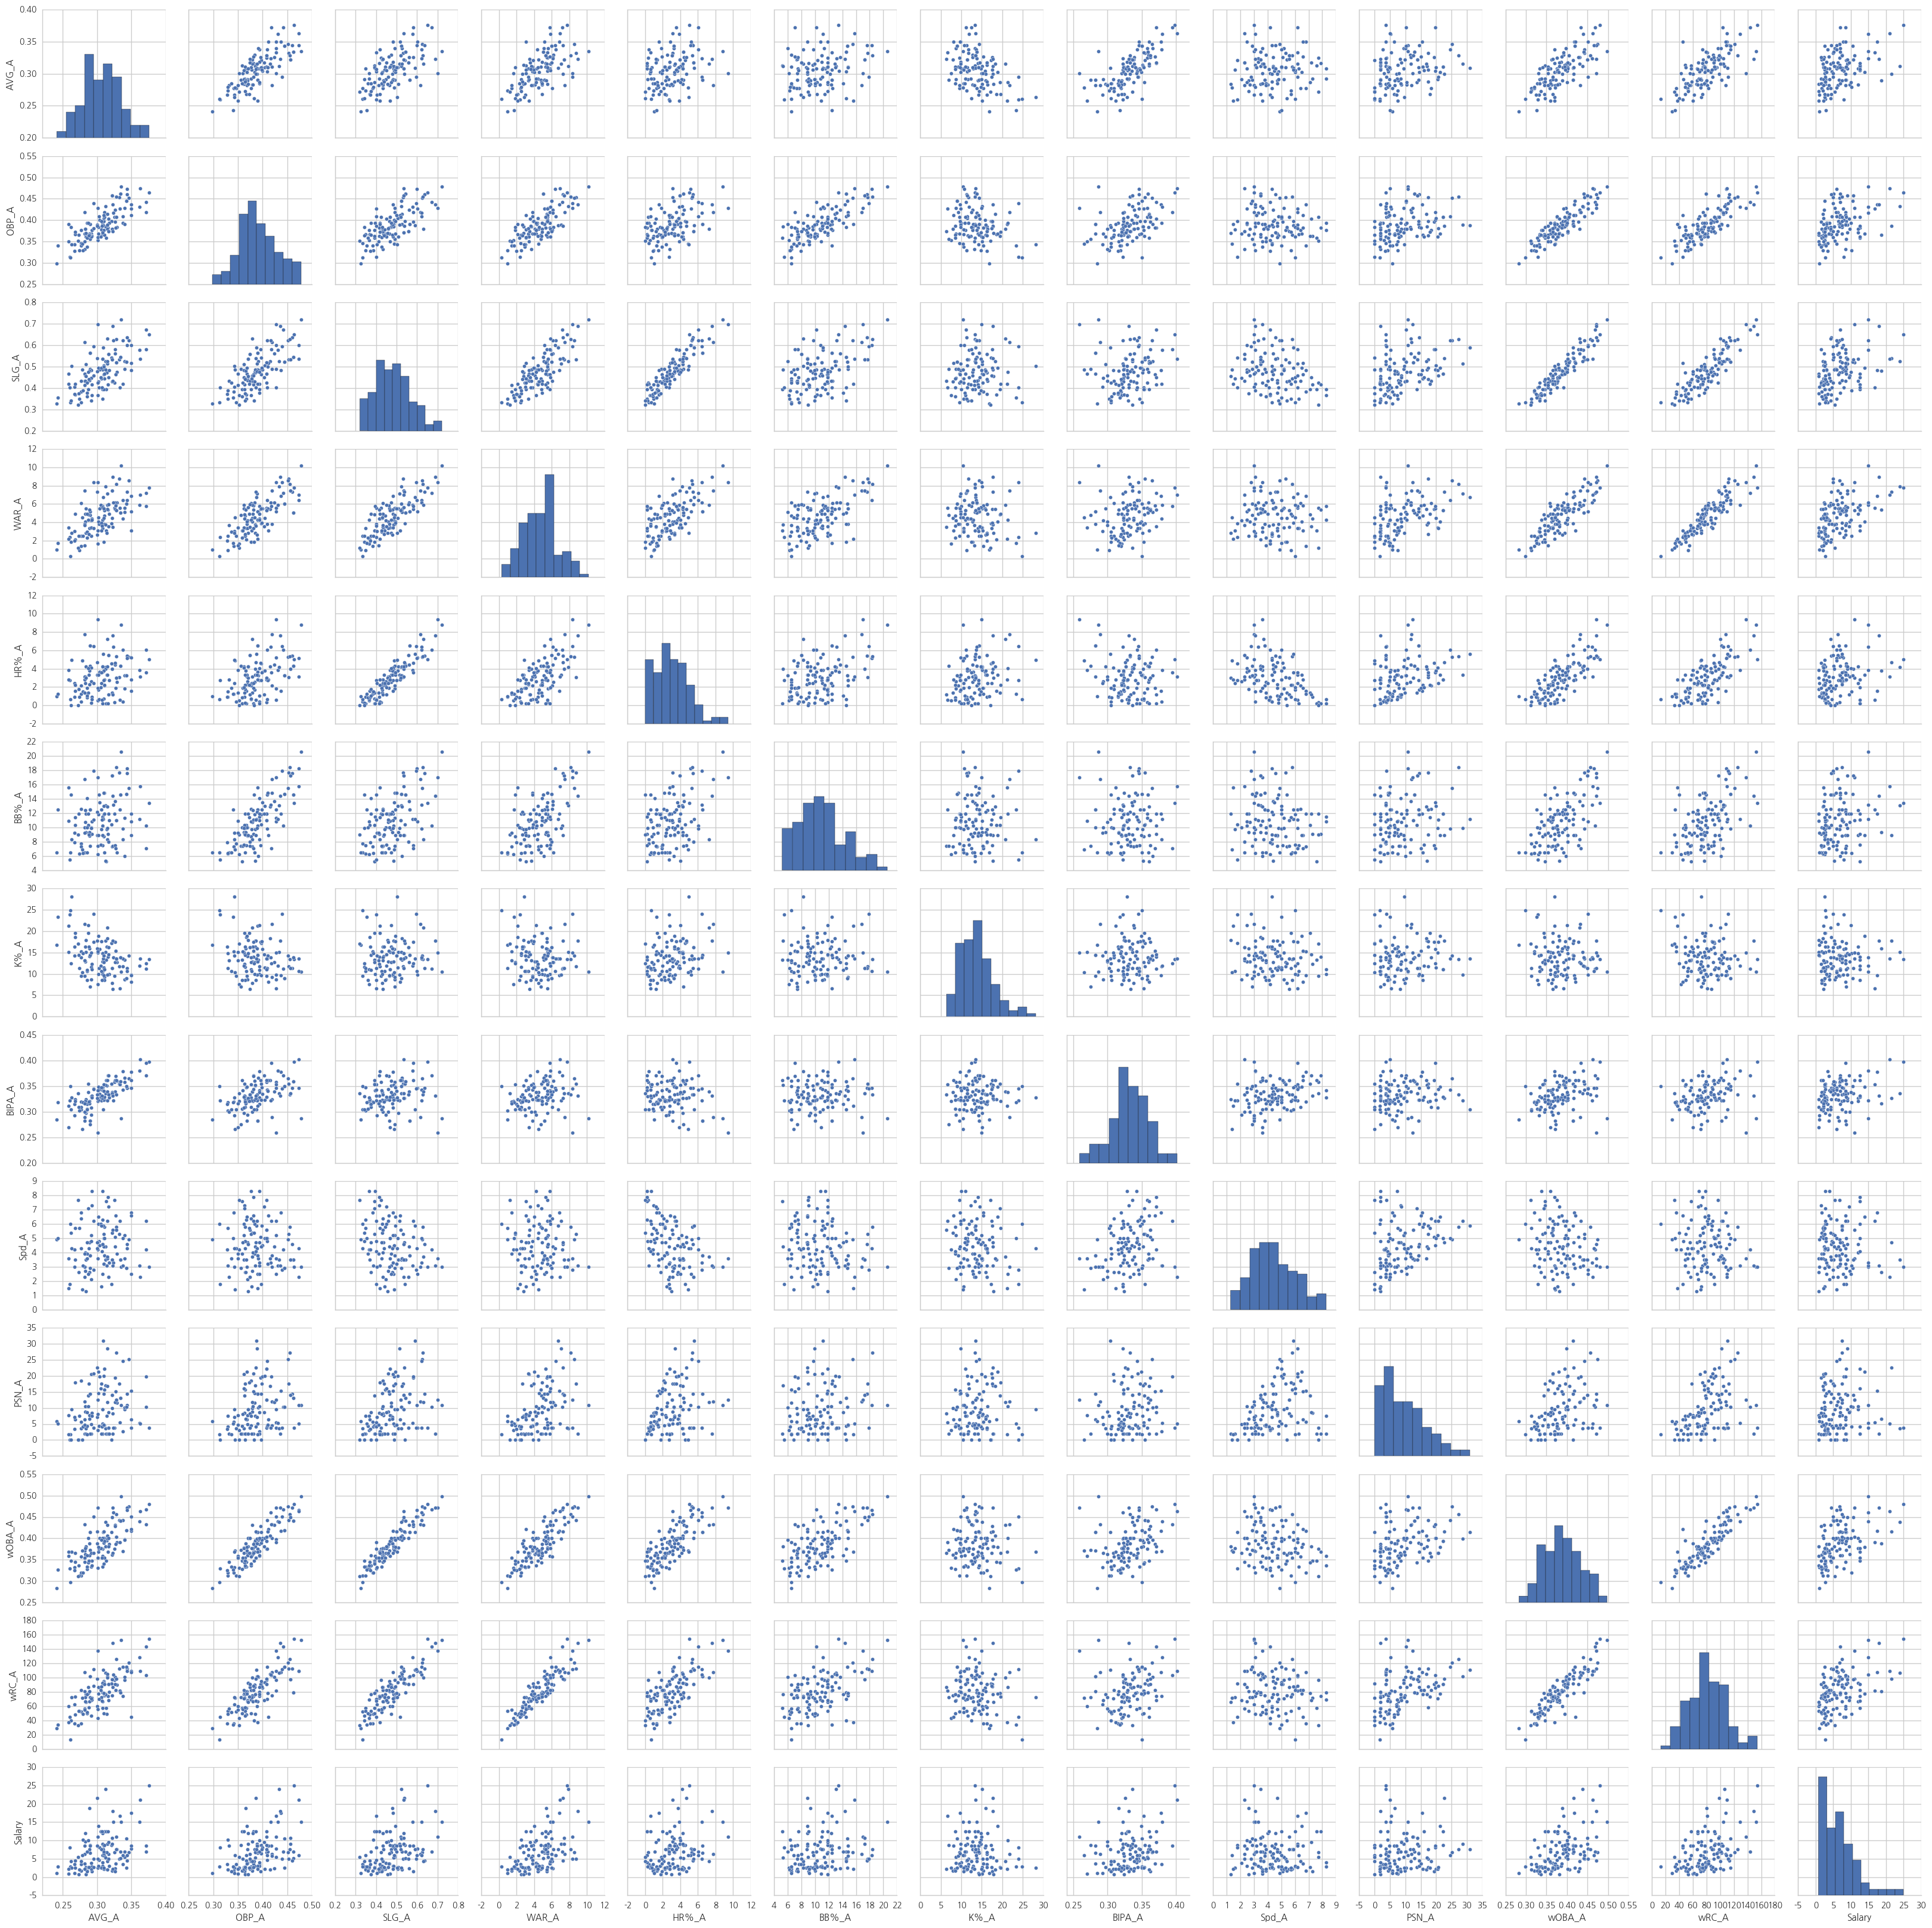

In [9]:
dff = pd.concat([df_hitter.ix[:,1:13], df_hitter.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

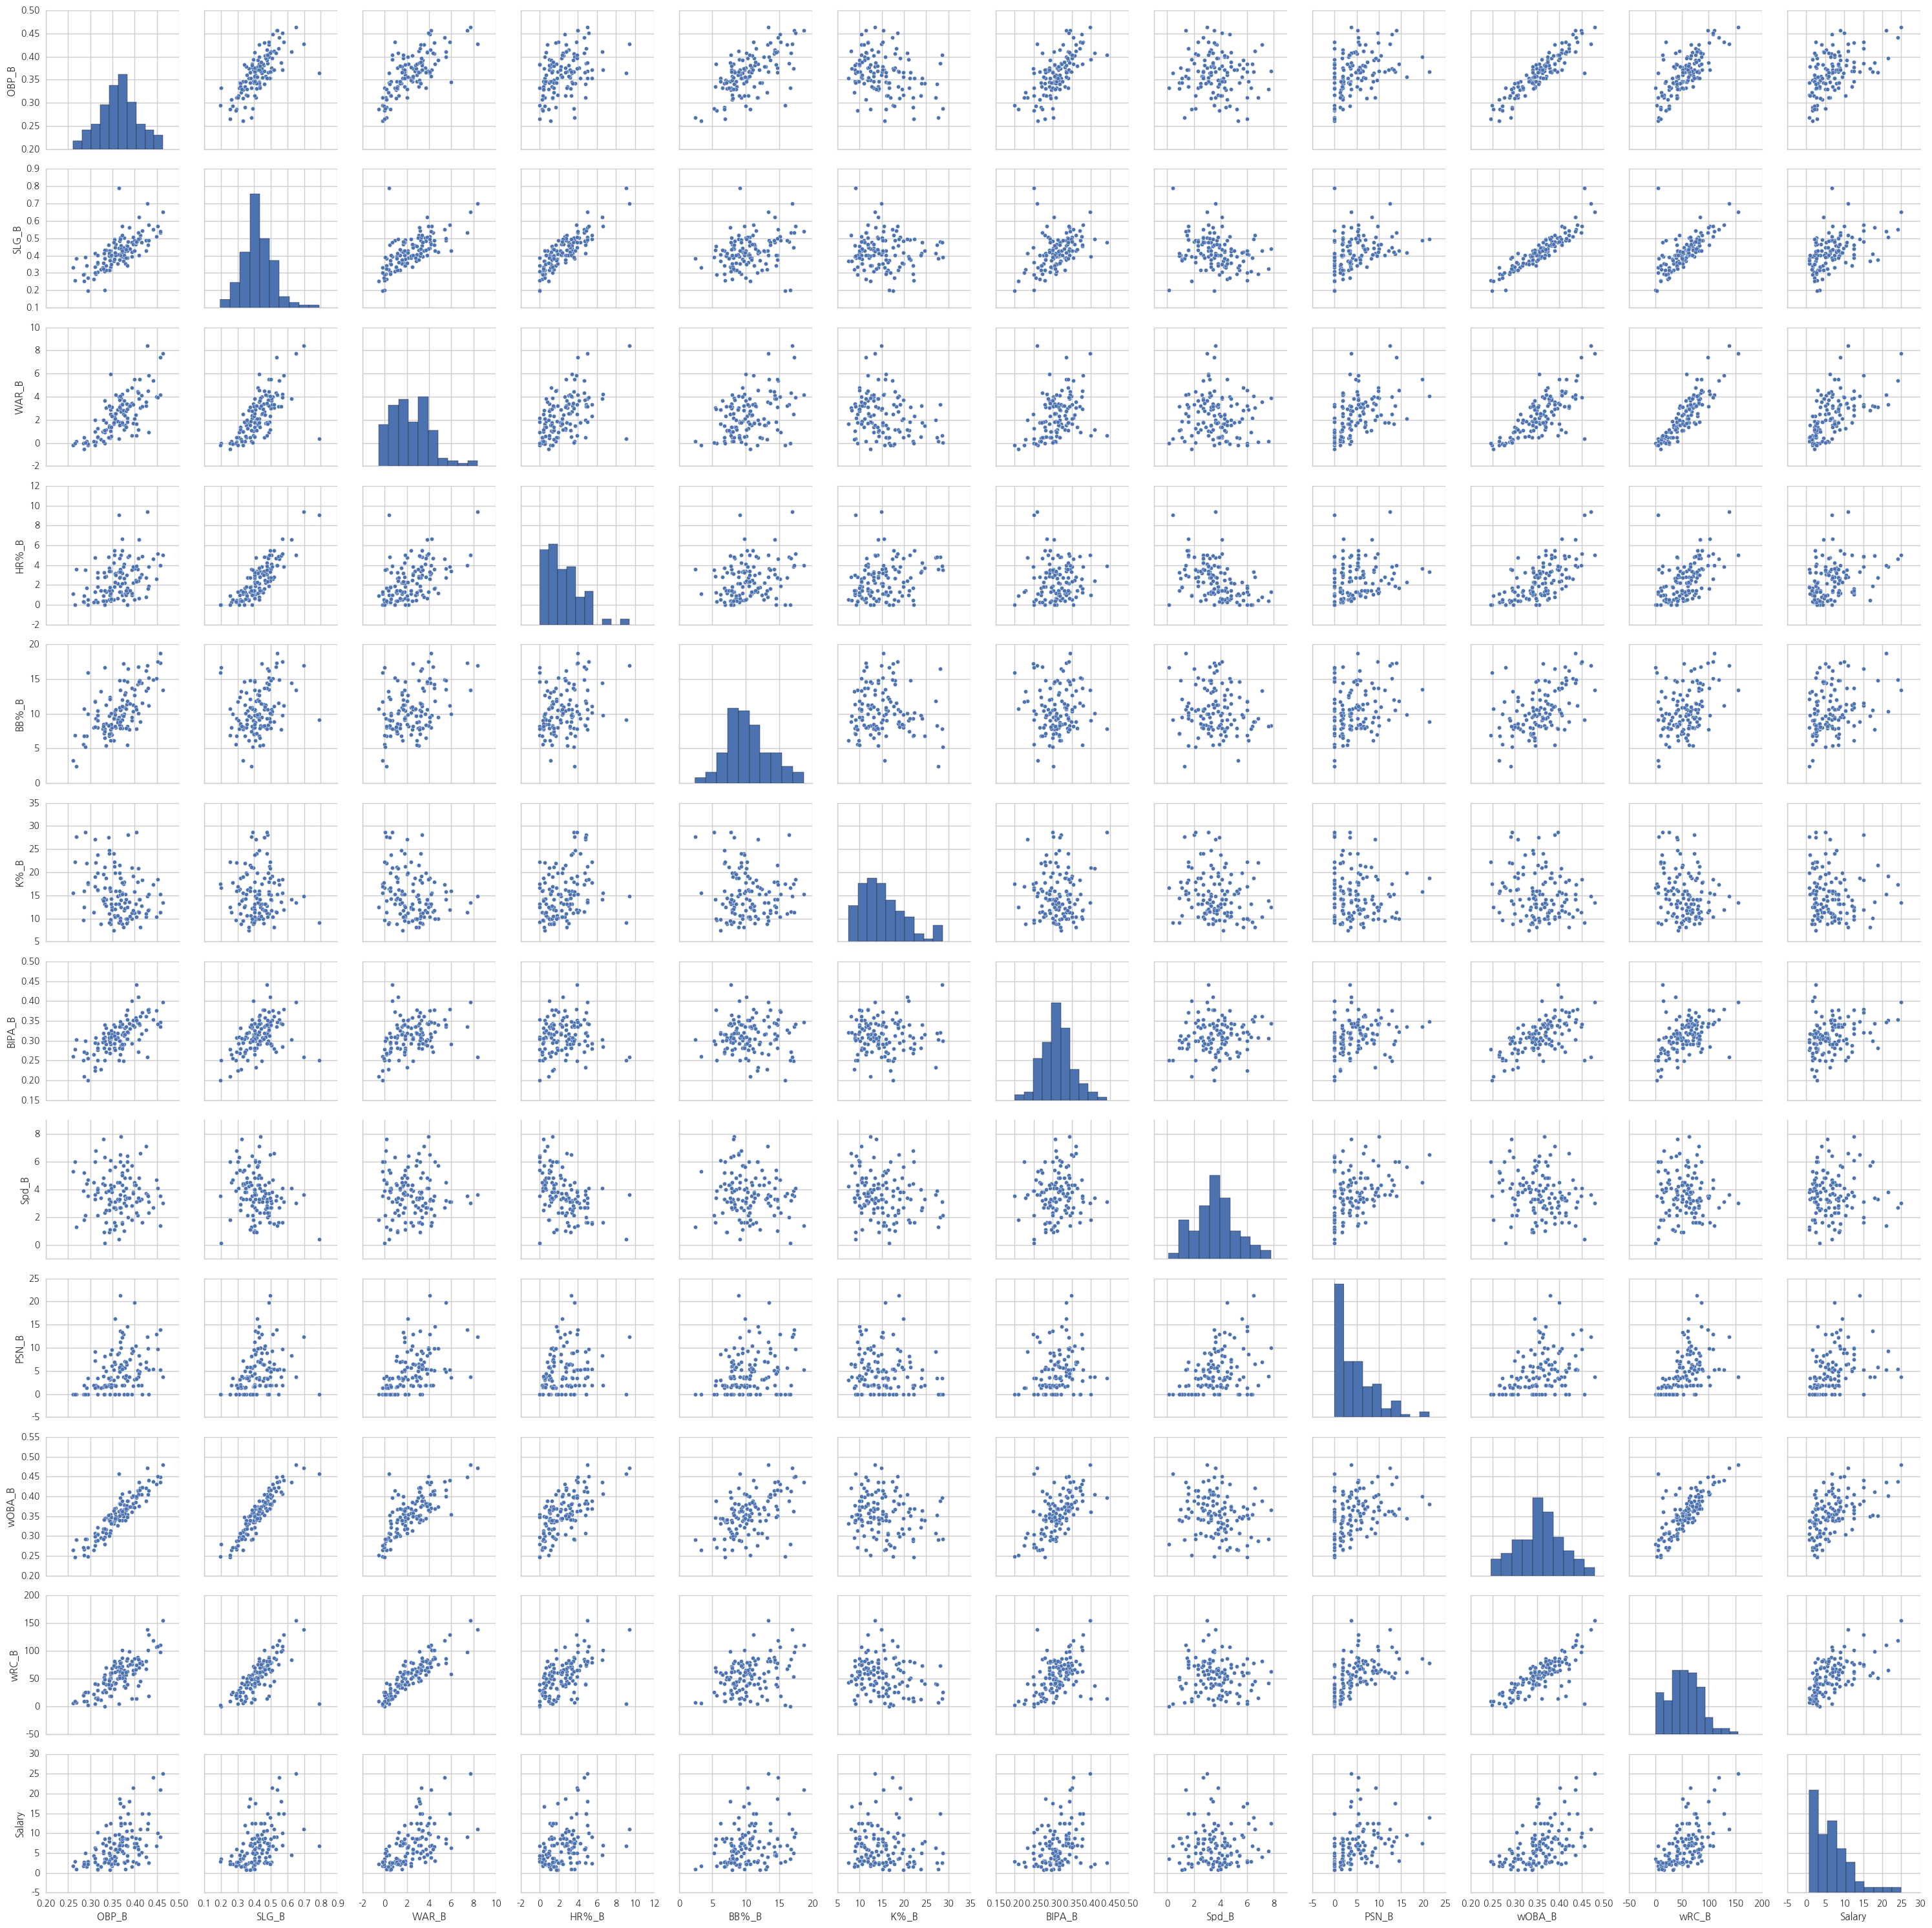

In [10]:
dff = pd.concat([df_hitter.ix[:,-22:-11], df_hitter.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

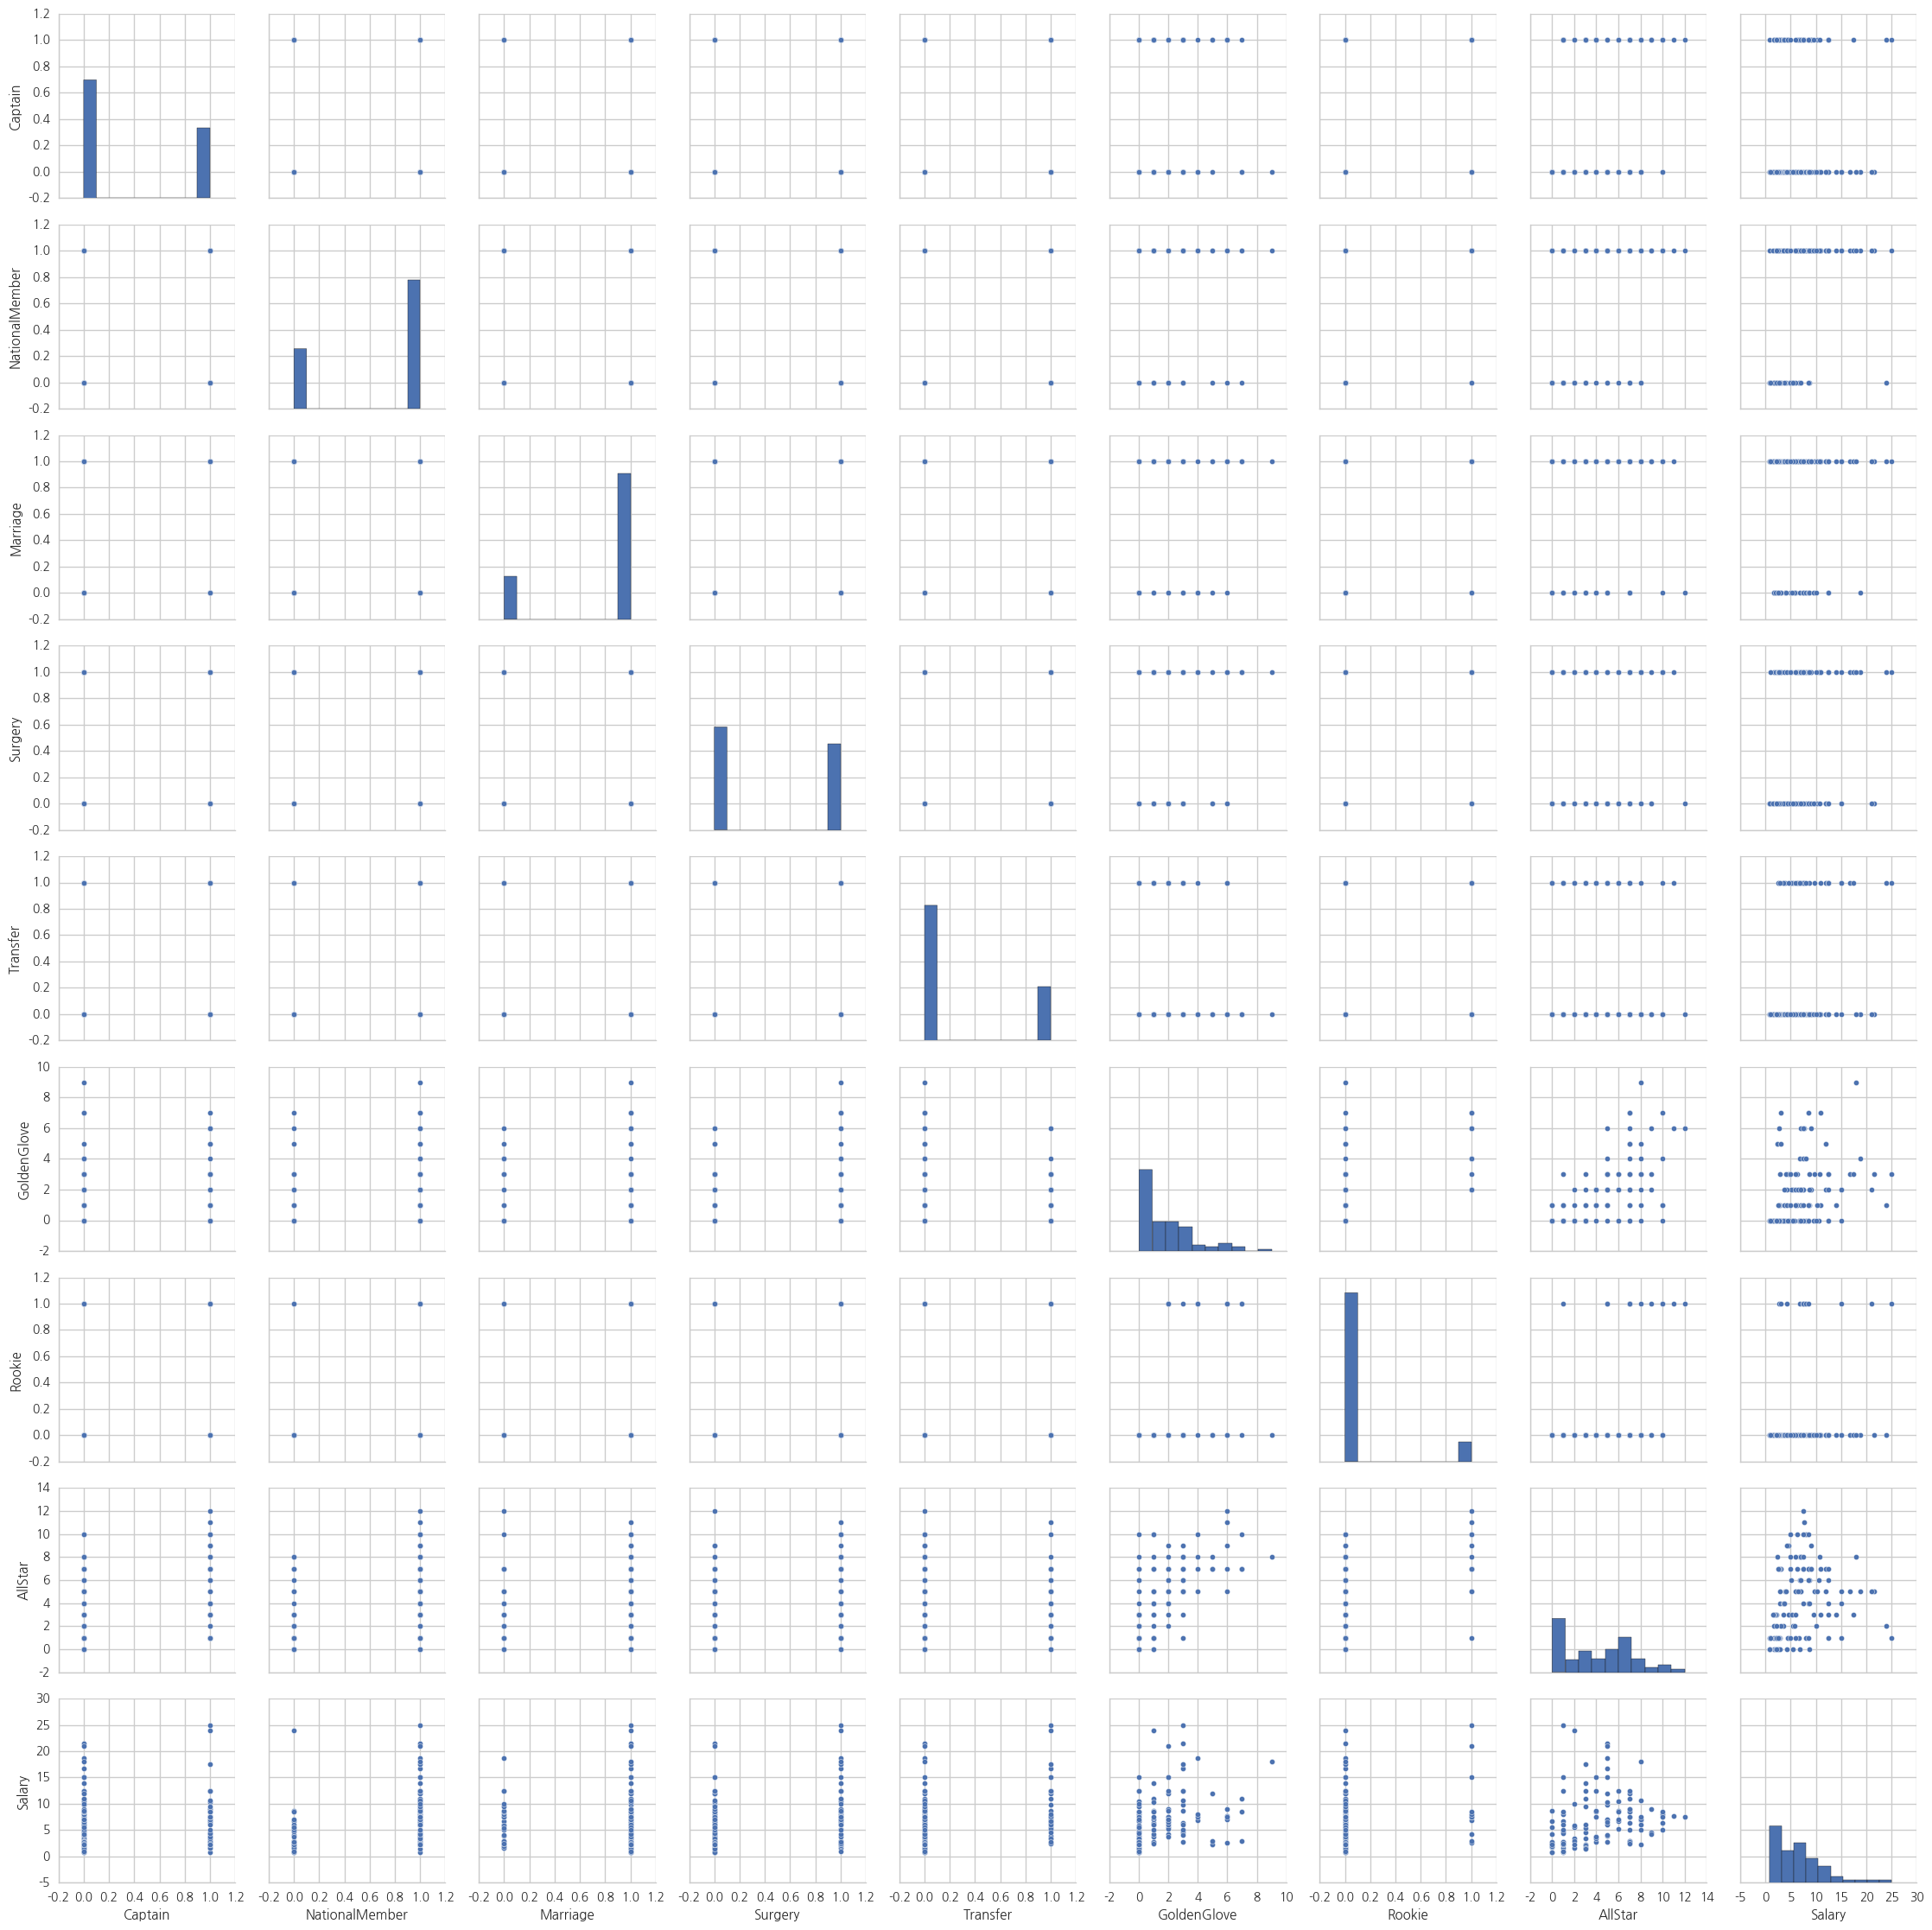

In [11]:
dff = pd.concat([df_hitter.ix[:,-9:-1], df_hitter.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

# 3.  로그변환 

In [46]:
#로그변환
df_hitter1 = df_hitter.copy()

df_hitter1["LogHR%_A"]= np.log(df_hitter1["HR%_A"]+0.00012)
df_hitter1["LogPSN_A"]= np.log(df_hitter1["PSN_A"]+0.00012)
df_hitter1["LogK%_A"]= np.log(df_hitter1["K%_A"]+0.00012)
df_hitter1["LogHR%_B"]= np.log(df_hitter1["HR%_B"]+0.00012)
df_hitter1["LogPSN_B"]= np.log(df_hitter1["PSN_B"]+0.00012)
df_hitter1["LogSalary"]= np.log(df_hitter1["Salary"]+0.00012)
del df_hitter1["HR%_A"]
del df_hitter1["PSN_A"]
del df_hitter1["K%_A"]
del df_hitter1["HR%_B"]
del df_hitter1["PSN_B"]
del df_hitter1["Salary"]
#idx = dfy_hitter. == '-'
#df_hitter1 = pd.concat([df_hitter1, dfy_hitter], axis=1)
#df_hitter1 = df_hitter1.drop(df_hitter1.index[idx]).astype(float)

In [47]:
df_hitter1.tail()

,const,AVG_A,OBP_A,SLG_A,WAR_A,BB%_A,BIPA_A,Spd_A,wOBA_A,wRC_A,wRAA_A,AVG_B,OBP_B,SLG_B,WAR_B,BB%_B,K%_B,BIPA_B,Spd_B,wOBA_B,wRC_B,wRAA_B,Age,Captain,NationalMember,Marriage,Surgery,Transfer,GoldenGlove,Rookie,AllStar,LogHR%_A,LogPSN_A,LogK%_A,LogHR%_B,LogPSN_B,LogSalary
120,1.0,0.307,0.386,0.402,3.64,11.1,0.331,4.1,0.354,67.5,2.1,0.310,0.389,0.440,3.24,11.5,10.5,0.330,4.8,0.374,75.9,6.4,33.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.477842,1.435113,2.151776,0.343675,2.010911,2.525738
121,1.0,0.287,0.394,0.474,4.23,11.9,0.338,2.5,0.400,86.7,24.5,0.308,0.451,0.571,3.94,17.5,18.5,0.342,4.1,0.450,108.3,40.2,33.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.391312,2.351387,3.058713,1.637076,2.270074,2.302597
122,1.0,0.282,0.350,0.413,1.45,9.2,0.316,3.9,0.354,54.8,4.0,0.335,0.408,0.497,1.18,10.1,20.8,0.410,3.4,0.404,37.5,8.5,36.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.343675,1.568641,2.580226,0.883817,1.321788,0.810984
123,1.0,0.310,0.411,0.499,5.50,14.8,0.341,3.2,0.416,78.0,30.7,0.322,0.380,0.435,1.37,7.9,14.1,0.365,4.1,0.369,62.1,3.5,38.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,8.0,1.008002,1.568641,2.653250,0.364726,1.925725,1.945927
124,1.0,0.328,0.408,0.520,5.33,11.0,0.362,5.6,0.404,98.8,31.4,0.332,0.403,0.480,1.66,10.6,10.4,0.351,2.3,0.400,74.9,15.5,38.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,8.0,1.108602,2.532912,2.602699,0.858712,1.203008,2.014919


In [48]:
model_sm1 = sm.OLS(df_hitter1.ix[:,-1], df_hitter1.ix[:,:-1])
result_sm1 = model_sm1.fit()
print(result_sm1.summary())

                            OLS Regression Results                            
Dep. Variable:              LogSalary   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     7.579
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           9.76e-15
Time:                        15:18:54   Log-Likelihood:                -55.691
No. Observations:                 123   AIC:                             183.4
Df Residuals:                      87   BIC:                             284.6
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.6719      2.726     -0.

# 4. Heatmap 

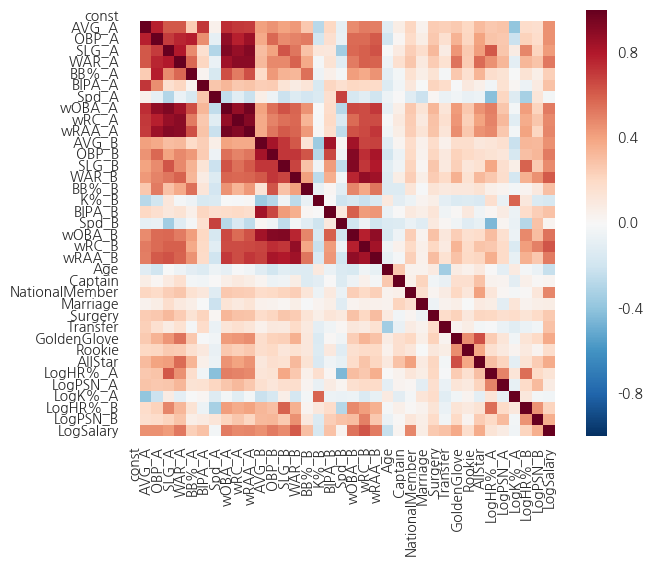

In [49]:
cormat = df_hitter1.corr()
sns.heatmap(cormat, square=True)
plt.show()

## SLG_A,  wOBA_A,  wOBA_B 제거 - 1차


In [50]:
del df_hitter1["SLG_A"]
del df_hitter1["wOBA_A"]
del df_hitter1["wOBA_B"]


In [51]:
model_sm1 = sm.OLS(df_hitter1.ix[:,-1], df_hitter1.ix[:,:-1])
result_sm1 = model_sm1.fit()
print(result_sm1.summary())

                            OLS Regression Results                            
Dep. Variable:              LogSalary   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     7.314
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           4.25e-14
Time:                        15:19:11   Log-Likelihood:                -62.912
No. Observations:                 123   AIC:                             191.8
Df Residuals:                      90   BIC:                             284.6
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2051      2.660      0.

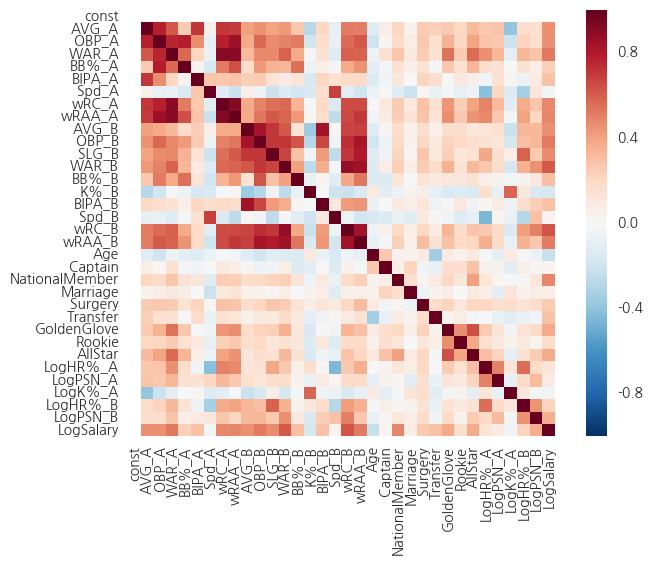

In [52]:
cormat = df_hitter1.corr()
sns.heatmap(cormat, square=True)
plt.show()

## wRC_A,wRC_B 제거 - 2차   

In [53]:
del df_hitter1["wRC_A"]
del df_hitter1["wRC_B"]
df_hitter2 = df_hitter1
model_sm2 = sm.OLS(df_hitter2.ix[:,-1], df_hitter2.ix[:,:-1])
result_sm2 = model_sm2.fit()
print(result_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:              LogSalary   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     6.189
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           6.20e-12
Time:                        15:19:19   Log-Likelihood:                -73.762
No. Observations:                 123   AIC:                             209.5
Df Residuals:                      92   BIC:                             296.7
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.8585      2.803     -0.

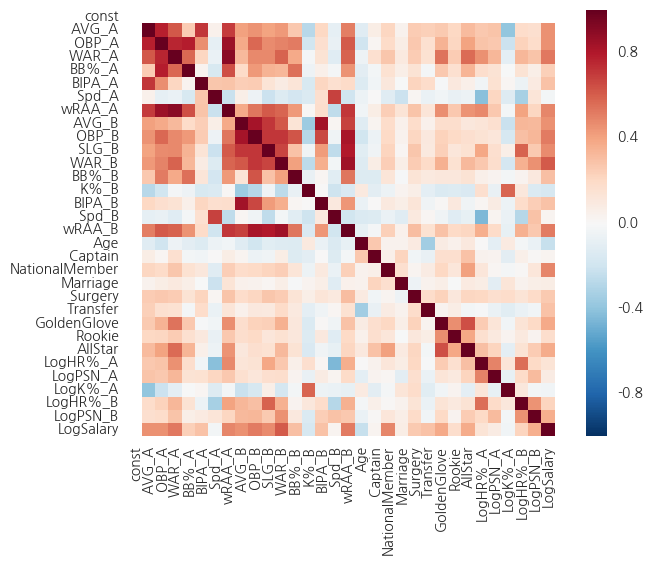

In [54]:
cormat = df_hitter2.corr()
sns.heatmap(cormat, square=True)
plt.show()

## wRAA_A , wRAA_B 제거 - 3차

In [55]:
del df_hitter2["wRAA_A"]
del df_hitter2["wRAA_B"]
model_sm2 = sm.OLS(df_hitter2.ix[:,-1], df_hitter2.ix[:,:-1])
result_sm2 = model_sm2.fit()
print(result_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:              LogSalary   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     6.642
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           1.54e-12
Time:                        15:19:37   Log-Likelihood:                -74.573
No. Observations:                 123   AIC:                             207.1
Df Residuals:                      94   BIC:                             288.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2292      2.134     -0.

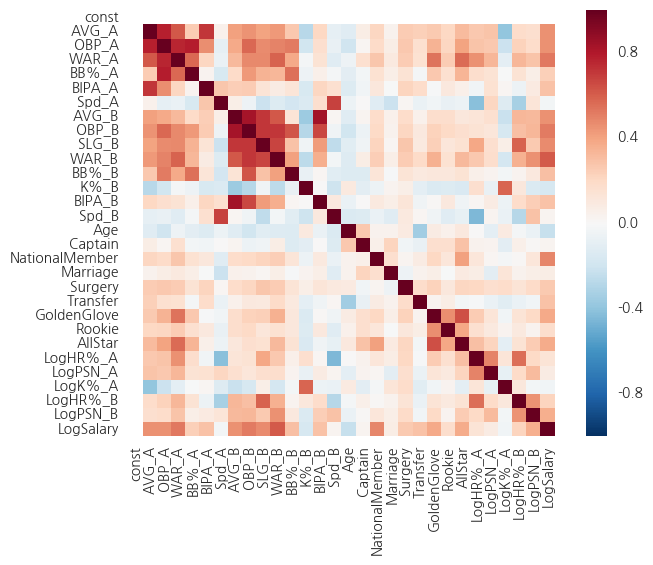

In [56]:
cormat = df_hitter2.corr()
sns.heatmap(cormat, square=True)
plt.show()

In [ ]:
sns.pairplot(df_hitter2)

 # 5. ETC 변수제거 

In [141]:
del df_hitter2["Captain"]
del df_hitter2["Transfer"]
del df_hitter2["Marriage"]
model_sm2 = sm.OLS(df_hitter2.ix[:,-1], df_hitter2.ix[:,:-1])
result_sm2 = model_sm2.fit()
print(result_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     5.848
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           1.03e-10
Time:                        11:44:19   Log-Likelihood:                -316.09
No. Observations:                 123   AIC:                             684.2
Df Residuals:                      97   BIC:                             757.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.5809     14.393      0.

In [142]:
df_hitter3 = df_hitter2

 # 6.  P>|t| 50% 이상 제거 --------------------- 보류

In [143]:
del df_hitter3["Spd_A"]
del df_hitter3["BIPA_A"]
del df_hitter3["OBP_B"]
del df_hitter3["BB%_B"]
del df_hitter3["Surgery"]
del df_hitter3["GoldenGlove"]
del df_hitter3["LogHR%_A"]
del df_hitter3["NationalMember"]

model_sm3 = sm.OLS(df_hitter3.ix[:,-1], df_hitter3.ix[:,:-1])
result_sm3 = model_sm3.fit()
print(result_sm3.summary())





                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     5.584
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           9.27e-09
Time:                        11:45:14   Log-Likelihood:                -333.02
No. Observations:                 123   AIC:                             702.0
Df Residuals:                     105   BIC:                             752.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6865     12.259     -0.301      0.7

In [92]:
model = sm.OLS.from_formula("salary ~AVG_A+	OBP_A+	WAR_A+	BB%_B+	SLG_B+	WAR_B+ 	Spd_B+	Age +	Marriage+	LogPSN_A+	LogHR%_B ", data=df_hitter1



SyntaxError: unexpected EOF while parsing (<ipython-input-92-ba97fc1c192a>, line 1)

hitter_12345